In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Import needed librarys.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

Load data.

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=13)
print('Download complete.')

57344/57026 [==============================] - 0s 0us/step
Download complete.


In [4]:
x_train, y_train = x_train.astype("float32"), y_train.astype("float32")

### Info about data from http://lib.stat.cmu.edu/datasets/boston

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV  Median value of owner-occupied homes in $1000's

In [5]:
columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',\
           'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(x_train, columns=columns)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.0,0.614,5.304,97.300003,2.1007,24.0,666.0,20.200001,349.480011,24.91
1,5.44114,0.0,18.10,0.0,0.713,6.655,98.199997,2.3552,24.0,666.0,20.200001,355.290009,17.73
2,1.00245,0.0,8.14,0.0,0.538,6.674,87.300003,4.2390,4.0,307.0,21.000000,380.230011,11.98
3,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
4,0.26169,0.0,9.90,0.0,0.544,6.023,90.400002,2.8340,4.0,304.0,18.400000,396.299988,11.72


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.738486,11.530941,10.974239,0.076733,0.551225,6.305846,68.110901,3.835318,9.569307,408.383667,18.497797,356.956177,12.620049
std,9.011991,23.342165,6.825140,0.266497,0.114431,0.694874,28.133350,2.106375,8.730755,169.942810,2.133723,89.869530,7.035633
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.082382,0.000000,5.190000,0.000000,0.448000,5.903250,44.924999,2.111750,4.000000,277.000000,17.400000,374.649994,6.867500
50%,0.229480,0.000000,8.560000,0.000000,0.524000,6.209000,76.250000,3.215700,5.000000,330.000000,19.100000,391.304993,11.395000
75%,3.716457,13.750000,18.100000,0.000000,0.624000,6.629250,93.800003,5.255350,24.000000,666.000000,20.200001,396.059998,17.112501
max,88.976196,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200001,396.899994,37.970001


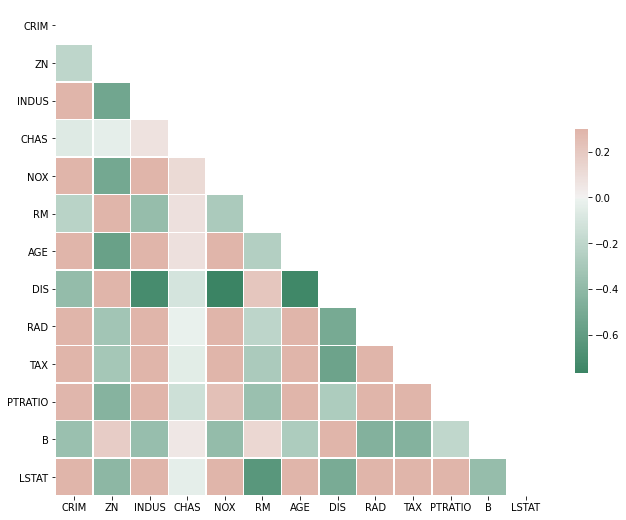

In [8]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(150, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Functional API method

In [9]:
inputs = keras.Input(shape=(13,))

dense = keras.layers.experimental.preprocessing.Normalization()
dense.adapt(x_train)
x = dense(inputs)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1)(x)


model = keras.Model(inputs=inputs, outputs=outputs, name="mlp_b_h")

In [10]:
model.summary()

Model: "mlp_b_h"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21  

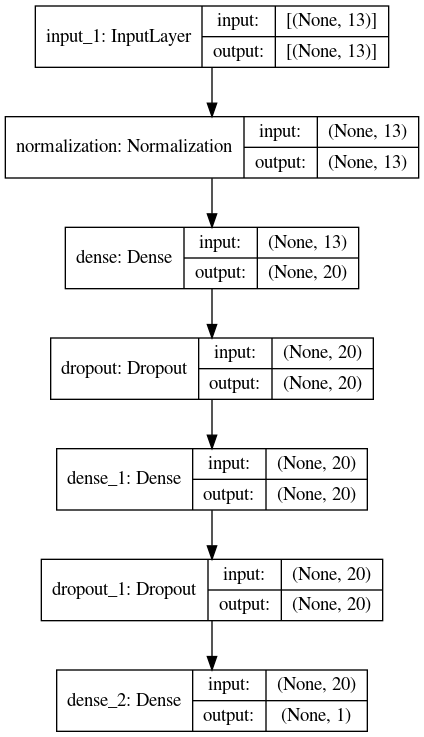

In [11]:
keras.utils.plot_model(model, "mlp_b_h.png", show_shapes=True)

In [12]:
def get_scores(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train, batch_size=32,epochs=10)
    return model.evaluate(X_valid, Y_valid)

In [13]:
score_models = []
kf = KFold(n_splits=10)
for train_index, valid_index in kf.split(x_train):
    model = keras.Model(inputs=inputs, outputs=outputs, name="mlp_b_h")
    model.compile(loss=keras.losses.MeanSquaredError(reduction="auto"),
              optimizer=keras.optimizers.Adam(), metrics=tf.keras.metrics.RootMeanSquaredError())
    X_train, X_valid = x_train[train_index], x_train[valid_index]
    Y_train, Y_valid = y_train[train_index], y_train[valid_index]    
    score_models.append(get_scores(model, X_train, Y_train, X_valid, Y_valid))

Epoch 1/10
12/12 [==============================] - 1s 2ms/step - loss: 608.0301 - root_mean_squared_error: 24.6466
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 527.7987 - root_mean_squared_error: 22.9656
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 534.1208 - root_mean_squared_error: 23.1078
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 520.5383 - root_mean_squared_error: 22.8118
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 490.8100 - root_mean_squared_error: 22.1491
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 448.4752 - root_mean_squared_error: 21.1762
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 406.0793 - root_mean_squared_error: 20.1469
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 350.5215 - root_mean_squared_error: 18.7218
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 

In [14]:
mean_score = np.array(score_models).mean(axis=0)
print(f"Mean loss & metric equal: {mean_score}")

Mean loss & metric equal: [34.95307512  5.238781  ]


In [15]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mlp_b_h")
model.compile(loss=keras.losses.MeanSquaredError(reduction="auto"),
              optimizer=keras.optimizers.Adam(), metrics=tf.keras.metrics.RootMeanSquaredError())
model.fit(X_train, Y_train, batch_size=32,epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 32.7350 - root_mean_squared_error: 5.7102
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 33.0536 - root_mean_squared_error: 5.6614
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 27.3484 - root_mean_squared_error: 5.2250
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 22.5073 - root_mean_squared_error: 4.7300
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 30.4179 - root_mean_squared_error: 5.5115
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 23.5840 - root_mean_squared_error: 4.8229
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 31.0687 - root_mean_squared_error: 5.5702
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 27.8681 - root_mean_squared_error: 5.2761
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 29.9671 - root_m

In [16]:
test_scores = model.evaluate(x_test, y_test, verbose=2)

4/4 - 0s - loss: 16.1515 - root_mean_squared_error: 4.0189


# Model subclassing method

In [17]:
class MyModel(keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        self.norm = layers.experimental.preprocessing.Normalization()
        self.dense_1 = layers.Dense(20, activation='relu')
        self.drop_1 = layers.Dropout(0.2)
        self.dense_2 = layers.Dense(20, activation='relu')
        self.drop_2 = layers.Dropout(0.2)
        self.dense_3 = layers.Dense(1, activation='softmax')
        
    def call(self, inputs):
        self.norm.adapt(x_train)
        x = self.norm(inputs)
        x = self.dense_1(x)
        x = self.drop_1(x)
        x = self.dense_2(x)
        x = self.drop_2(x)
        return self.dense_3(x)
    
opt = keras.optimizers.Adam()
loss = keras.losses.MeanSquaredError(reduction="auto")
metrics = keras.metrics.RootMeanSquaredError()

In [18]:
score_mlp = []
kf = KFold(n_splits=10)
for train_index, valid_index in kf.split(x_train):
    mlp = MyModel()
    mlp.compile(optimizer=opt, loss=loss, metrics=metrics)
    X_train, X_valid = x_train[train_index], x_train[valid_index]
    Y_train, Y_valid = y_train[train_index], y_train[valid_index]    
    score_mlp.append(get_scores(mlp, X_train, Y_train, X_valid, Y_valid))

Epoch 1/10
12/12 [==============================] - 1s 1ms/step - loss: 552.1399 - root_mean_squared_error: 23.4971
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 542.6127 - root_mean_squared_error: 23.2857
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 551.0390 - root_mean_squared_error: 23.4720
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 567.7944 - root_mean_squared_error: 23.8255
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 527.4428 - root_mean_squared_error: 22.9571
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: 594.4348 - root_mean_squared_error: 24.3666
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 532.9016 - root_mean_squared_error: 23.0808
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 567.5647 - root_mean_squared_error: 23.8223
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 

In [19]:
mlp_mean_score = np.array(score_mlp).mean(axis=0)
print(f"Mean loss & metric equal: {mlp_mean_score}")

Mean loss & metric equal: [542.23202209  23.22964306]


In [20]:
mlp = MyModel()
mlp.compile(optimizer=opt, loss=loss, metrics=metrics)
mlp.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 542.4357 - root_mean_squared_error: 23.8090
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 523.3376 - root_mean_squared_error: 22.8735
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 526.5263 - root_mean_squared_error: 22.9366
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 517.8839 - root_mean_squared_error: 22.7323
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 559.1424 - root_mean_squared_error: 23.6423
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 557.0449 - root_mean_squared_error: 23.5752
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 545.2420 - root_mean_squared_error: 23.3482
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 543.2881 - root_mean_squared_error: 23.3041
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 

In [21]:
test_scores = mlp.evaluate(x_test, y_test, verbose=2)

4/4 - 0s - loss: 572.2935 - root_mean_squared_error: 23.9227


In [22]:
np.array(score_models)[:, 1:]* 100

array([[1223.4044075 ],
       [ 758.4830761 ],
       [ 535.18242836],
       [ 365.84141254],
       [ 302.7705431 ],
       [ 566.19052887],
       [ 300.50439835],
       [ 536.09743118],
       [ 296.53544426],
       [ 353.77132893]])

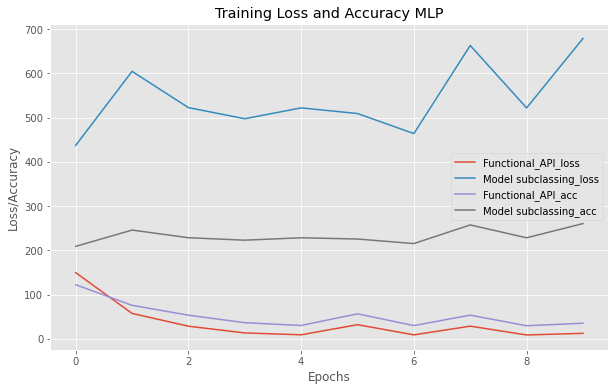

In [23]:
N = np.arange(0, 10)
title = "Training Loss and Accuracy MLP"

plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(N, np.array(score_models)[:, :1], label="Functional_API_loss")
plt.plot(N, np.array(score_mlp)[:, :1], label="Model subclassing_loss")
plt.plot(N, np.array(score_models)[:, 1:] * 10, label="Functional_API_acc")
plt.plot(N, np.array(score_mlp)[:, 1:] * 10, label="Model subclassing_acc")
plt.title(title)
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()